In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# SKLEARN
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


# Others
from xgboost import XGBClassifier
from collections import Counter


In [3]:
cd ..

/Users/yusuke/code/neylabelmaachi/schoolpred


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
from dropout_pred.data import DropoutPred

In [6]:
training_data = DropoutPred.get_training_data()

In [7]:
training_data.dtypes

hhid                       object
gender                    float64
mother_alive              float64
father_alive              float64
parents_age               float64
marital_status            float64
darija                    float64
class_arabic              float64
french                    float64
amazygh                   float64
read_one_lang             float64
write_one_lang            float64
no_read_write             float64
parents_level_ed          float64
work_activity             float64
number_of_person_in_hh    float64
type_housing              float64
automobiles               float64
mobile_phones             float64
satellite_receivers       float64
no_water                    int64
individual_water_net        int64
electrical_net_co           int64
school_id                  object
child_enrollment          float64
class_when_dropout        float64
region                     object
province                   object
age_dropout               float64
schoolunitid  

In [8]:
training_data.isna().sum() / len(training_data) * 100

hhid                       0.000000
gender                     0.144868
mother_alive               2.048841
father_alive               3.042219
parents_age                2.152318
marital_status             3.125000
darija                     1.717715
class_arabic               1.717715
french                     1.717715
amazygh                    1.717715
read_one_lang              4.180464
write_one_lang             3.911424
no_read_write              3.911424
parents_level_ed           2.731788
work_activity              3.683775
number_of_person_in_hh     0.310430
type_housing               0.682947
automobiles                1.117550
mobile_phones              0.786424
satellite_receivers        0.848510
no_water                   0.000000
individual_water_net       0.000000
electrical_net_co          0.000000
school_id                  0.000000
child_enrollment           0.517384
class_when_dropout        73.985927
region                     0.000000
province                   0

In [9]:
training_data.shape

(4832, 38)

In [10]:
DropoutPred.ping()

pong!


# Data Cleaning

In [11]:
training_data.isna().sum() / len(training_data) * 100

hhid                       0.000000
gender                     0.144868
mother_alive               2.048841
father_alive               3.042219
parents_age                2.152318
marital_status             3.125000
darija                     1.717715
class_arabic               1.717715
french                     1.717715
amazygh                    1.717715
read_one_lang              4.180464
write_one_lang             3.911424
no_read_write              3.911424
parents_level_ed           2.731788
work_activity              3.683775
number_of_person_in_hh     0.310430
type_housing               0.682947
automobiles                1.117550
mobile_phones              0.786424
satellite_receivers        0.848510
no_water                   0.000000
individual_water_net       0.000000
electrical_net_co          0.000000
school_id                  0.000000
child_enrollment           0.517384
class_when_dropout        73.985927
region                     0.000000
province                   0

## Remove more columns

In [12]:
columns_to_remove = [
    "child_enrollment",
    "class_when_dropout",
    "groupid",
    "type_unit",
    "num_menage",
    "digit_recognition_res",
    "number_recognition_res",
    "subtraction_res",
    "division_res",
    "schoolunitid",
    "school_id"
]

In [13]:
training_data = training_data.drop(columns=columns_to_remove)
training_data.head()

,hhid,gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,region,province,age_dropout,done_test
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,Marrakech - Tensift - Al Haouz,Essaouira,NaN,1.0
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,Marrakech - Tensift - Al Haouz,Essaouira,NaN,2.0
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,Chichaoua,NaN,1.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,Sous - Massa - Draa,Taroudant,NaN,2.0
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,Marrakech - Tensift - Al Haouz,Essaouira,NaN,1.0


In [14]:
training_data.shape

(4832, 27)

In [15]:
training_data.isna().sum() / len(training_data) * 100

hhid                       0.000000
gender                     0.144868
mother_alive               2.048841
father_alive               3.042219
parents_age                2.152318
marital_status             3.125000
darija                     1.717715
class_arabic               1.717715
french                     1.717715
amazygh                    1.717715
read_one_lang              4.180464
write_one_lang             3.911424
no_read_write              3.911424
parents_level_ed           2.731788
work_activity              3.683775
number_of_person_in_hh     0.310430
type_housing               0.682947
automobiles                1.117550
mobile_phones              0.786424
satellite_receivers        0.848510
no_water                   0.000000
individual_water_net       0.000000
electrical_net_co          0.000000
region                     0.000000
province                   0.000000
age_dropout               74.068709
done_test                  6.663907
dtype: float64

In [16]:
training_data_no_hhid = training_data.drop(columns=["hhid"])

In [17]:
training_data_no_hhid.duplicated().sum()

11

In [18]:
training_data.duplicated().sum()

0

## Drop NA's

In [19]:
na_to_drop = [
    "mobile_phones",
    'satellite_receivers',  
    'number_of_person_in_hh', 
    'gender', 
    'type_housing', 
    'automobiles',
    "marital_status",
    "parents_level_ed",
]

In [20]:
training_data.dropna(subset=na_to_drop,inplace=True)

In [21]:
training_data.isna().sum() / len(training_data) * 100

hhid                       0.000000
gender                     0.000000
mother_alive               0.666667
father_alive               1.733333
parents_age                0.733333
marital_status             0.000000
darija                     0.288889
class_arabic               0.288889
french                     0.288889
amazygh                    0.288889
read_one_lang              2.466667
write_one_lang             2.177778
no_read_write              2.177778
parents_level_ed           0.000000
work_activity              1.888889
number_of_person_in_hh     0.000000
type_housing               0.000000
automobiles                0.000000
mobile_phones              0.000000
satellite_receivers        0.000000
no_water                   0.000000
individual_water_net       0.000000
electrical_net_co          0.000000
region                     0.000000
province                   0.000000
age_dropout               74.822222
done_test                  6.400000
dtype: float64

In [22]:
training_data.shape

(4500, 27)

## Custom transform

### Work Category

In [23]:
work_cat = {
    1: 0, 
    2: 0, 
    3: 1, 
    9: 2, 
    4: 2,
    5: 2,
    7: 2,
    8: 2
}

In [24]:
training_data["parents_level_ed"].value_counts()

 1.0     3235
 3.0      679
 2.0      448
 4.0       76
 5.0       38
 6.0       18
 7.0        4
-99.0       2
Name: parents_level_ed, dtype: int64

In [25]:
training_data['work_activity'] = training_data.work_activity.map(work_cat)

In [26]:
training_data.isna().sum() / len(training_data) * 100

hhid                       0.000000
gender                     0.000000
mother_alive               0.666667
father_alive               1.733333
parents_age                0.733333
marital_status             0.000000
darija                     0.288889
class_arabic               0.288889
french                     0.288889
amazygh                    0.288889
read_one_lang              2.466667
write_one_lang             2.177778
no_read_write              2.177778
parents_level_ed           0.000000
work_activity              3.355556
number_of_person_in_hh     0.000000
type_housing               0.000000
automobiles                0.000000
mobile_phones              0.000000
satellite_receivers        0.000000
no_water                   0.000000
individual_water_net       0.000000
electrical_net_co          0.000000
region                     0.000000
province                   0.000000
age_dropout               74.822222
done_test                  6.400000
dtype: float64

In [27]:
training_data['work_activity'].value_counts()

0.0    2500
1.0    1375
2.0     474
Name: work_activity, dtype: int64

In [28]:
training_data['work_activity'].isna().sum()

151

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_activity', ylabel='count'>

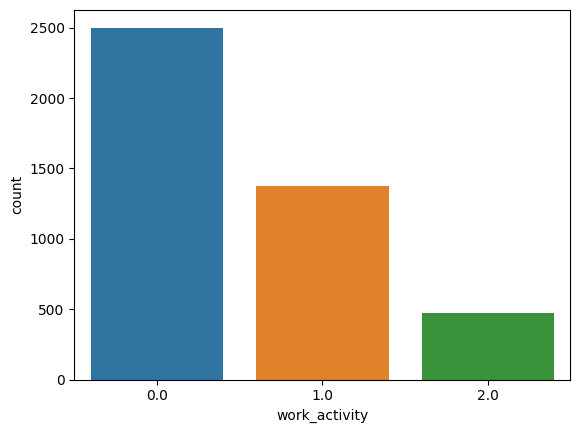

In [29]:
sns.countplot(training_data['work_activity'])

In [30]:
training_data = training_data.dropna(subset=['work_activity'])

In [31]:
training_data.isna().sum() / len(training_data) * 100

hhid                       0.000000
gender                     0.000000
mother_alive               0.597839
father_alive               1.609565
parents_age                0.735801
marital_status             0.000000
darija                     0.275926
class_arabic               0.275926
french                     0.275926
amazygh                    0.275926
read_one_lang              2.184410
write_one_lang             1.931479
no_read_write              1.931479
parents_level_ed           0.000000
work_activity              0.000000
number_of_person_in_hh     0.000000
type_housing               0.000000
automobiles                0.000000
mobile_phones              0.000000
satellite_receivers        0.000000
no_water                   0.000000
individual_water_net       0.000000
electrical_net_co          0.000000
region                     0.000000
province                   0.000000
age_dropout               74.844792
done_test                  6.323293
dtype: float64

In [32]:
training_data.isna().sum()

hhid                         0
gender                       0
mother_alive                26
father_alive                70
parents_age                 32
marital_status               0
darija                      12
class_arabic                12
french                      12
amazygh                     12
read_one_lang               95
write_one_lang              84
no_read_write               84
parents_level_ed             0
work_activity                0
number_of_person_in_hh       0
type_housing                 0
automobiles                  0
mobile_phones                0
satellite_receivers          0
no_water                     0
individual_water_net         0
electrical_net_co            0
region                       0
province                     0
age_dropout               3255
done_test                  275
dtype: int64

## Imputer

In [33]:
from sklearn.impute import SimpleImputer

sim_imputer_mean = SimpleImputer(strategy="mean")
sim_imputer_mf = SimpleImputer(strategy="most_frequent") 

In [34]:
columns_to_impute_mf = ['read_one_lang','no_read_write','write_one_lang','father_alive', 'mother_alive',"darija","class_arabic",'french','amazygh']

In [35]:
columns_to_impute_mean = ['parents_age']

In [36]:
sim_imputer_mean.fit(training_data[columns_to_impute_mean])

SimpleImputer()

In [37]:
sim_imputer_mf.fit(training_data[columns_to_impute_mf])

SimpleImputer(strategy='most_frequent')

In [38]:
training_data.isna().sum()

hhid                         0
gender                       0
mother_alive                26
father_alive                70
parents_age                 32
marital_status               0
darija                      12
class_arabic                12
french                      12
amazygh                     12
read_one_lang               95
write_one_lang              84
no_read_write               84
parents_level_ed             0
work_activity                0
number_of_person_in_hh       0
type_housing                 0
automobiles                  0
mobile_phones                0
satellite_receivers          0
no_water                     0
individual_water_net         0
electrical_net_co            0
region                       0
province                     0
age_dropout               3255
done_test                  275
dtype: int64

In [39]:
training_data[columns_to_impute_mean] = sim_imputer_mean.transform(training_data[columns_to_impute_mean])

In [40]:
training_data[columns_to_impute_mf] = sim_imputer_mf.transform(training_data[columns_to_impute_mf])

In [41]:
training_data.isna().sum()

hhid                         0
gender                       0
mother_alive                 0
father_alive                 0
parents_age                  0
marital_status               0
darija                       0
class_arabic                 0
french                       0
amazygh                      0
read_one_lang                0
write_one_lang               0
no_read_write                0
parents_level_ed             0
work_activity                0
number_of_person_in_hh       0
type_housing                 0
automobiles                  0
mobile_phones                0
satellite_receivers          0
no_water                     0
individual_water_net         0
electrical_net_co            0
region                       0
province                     0
age_dropout               3255
done_test                  275
dtype: int64

## Transform Target(Age Dropout)

### Target **Age abandoned school**
* 1 - Enrolled
* 0 - Dropout school

In [42]:
training_data['age_dropout'].fillna(0, inplace=True)

values_to_change = [12.0, 11.0, 13.0, 10.0, 9.0, 14.0, 8.0, 7.0, 6.0, 3.0, 15.0, 4.0, 5.0, -9.0, 2.0, 19.0, 17.0, 23.0]
training_data['age_dropout'] = training_data['age_dropout'].replace(values_to_change, 1)

In [43]:
training_data.isna().sum()

hhid                        0
gender                      0
mother_alive                0
father_alive                0
parents_age                 0
marital_status              0
darija                      0
class_arabic                0
french                      0
amazygh                     0
read_one_lang               0
write_one_lang              0
no_read_write               0
parents_level_ed            0
work_activity               0
number_of_person_in_hh      0
type_housing                0
automobiles                 0
mobile_phones               0
satellite_receivers         0
no_water                    0
individual_water_net        0
electrical_net_co           0
region                      0
province                    0
age_dropout                 0
done_test                 275
dtype: int64

In [44]:
training_data.shape

(4349, 27)

# Data Visualization

In [45]:
# Dropping tests results for now
training_data.drop(columns=["done_test"], inplace=True)

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_87379/2887771241.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(training_data.corr(),annot=True,ax=ax,fmt='0.1')


<AxesSubplot:>

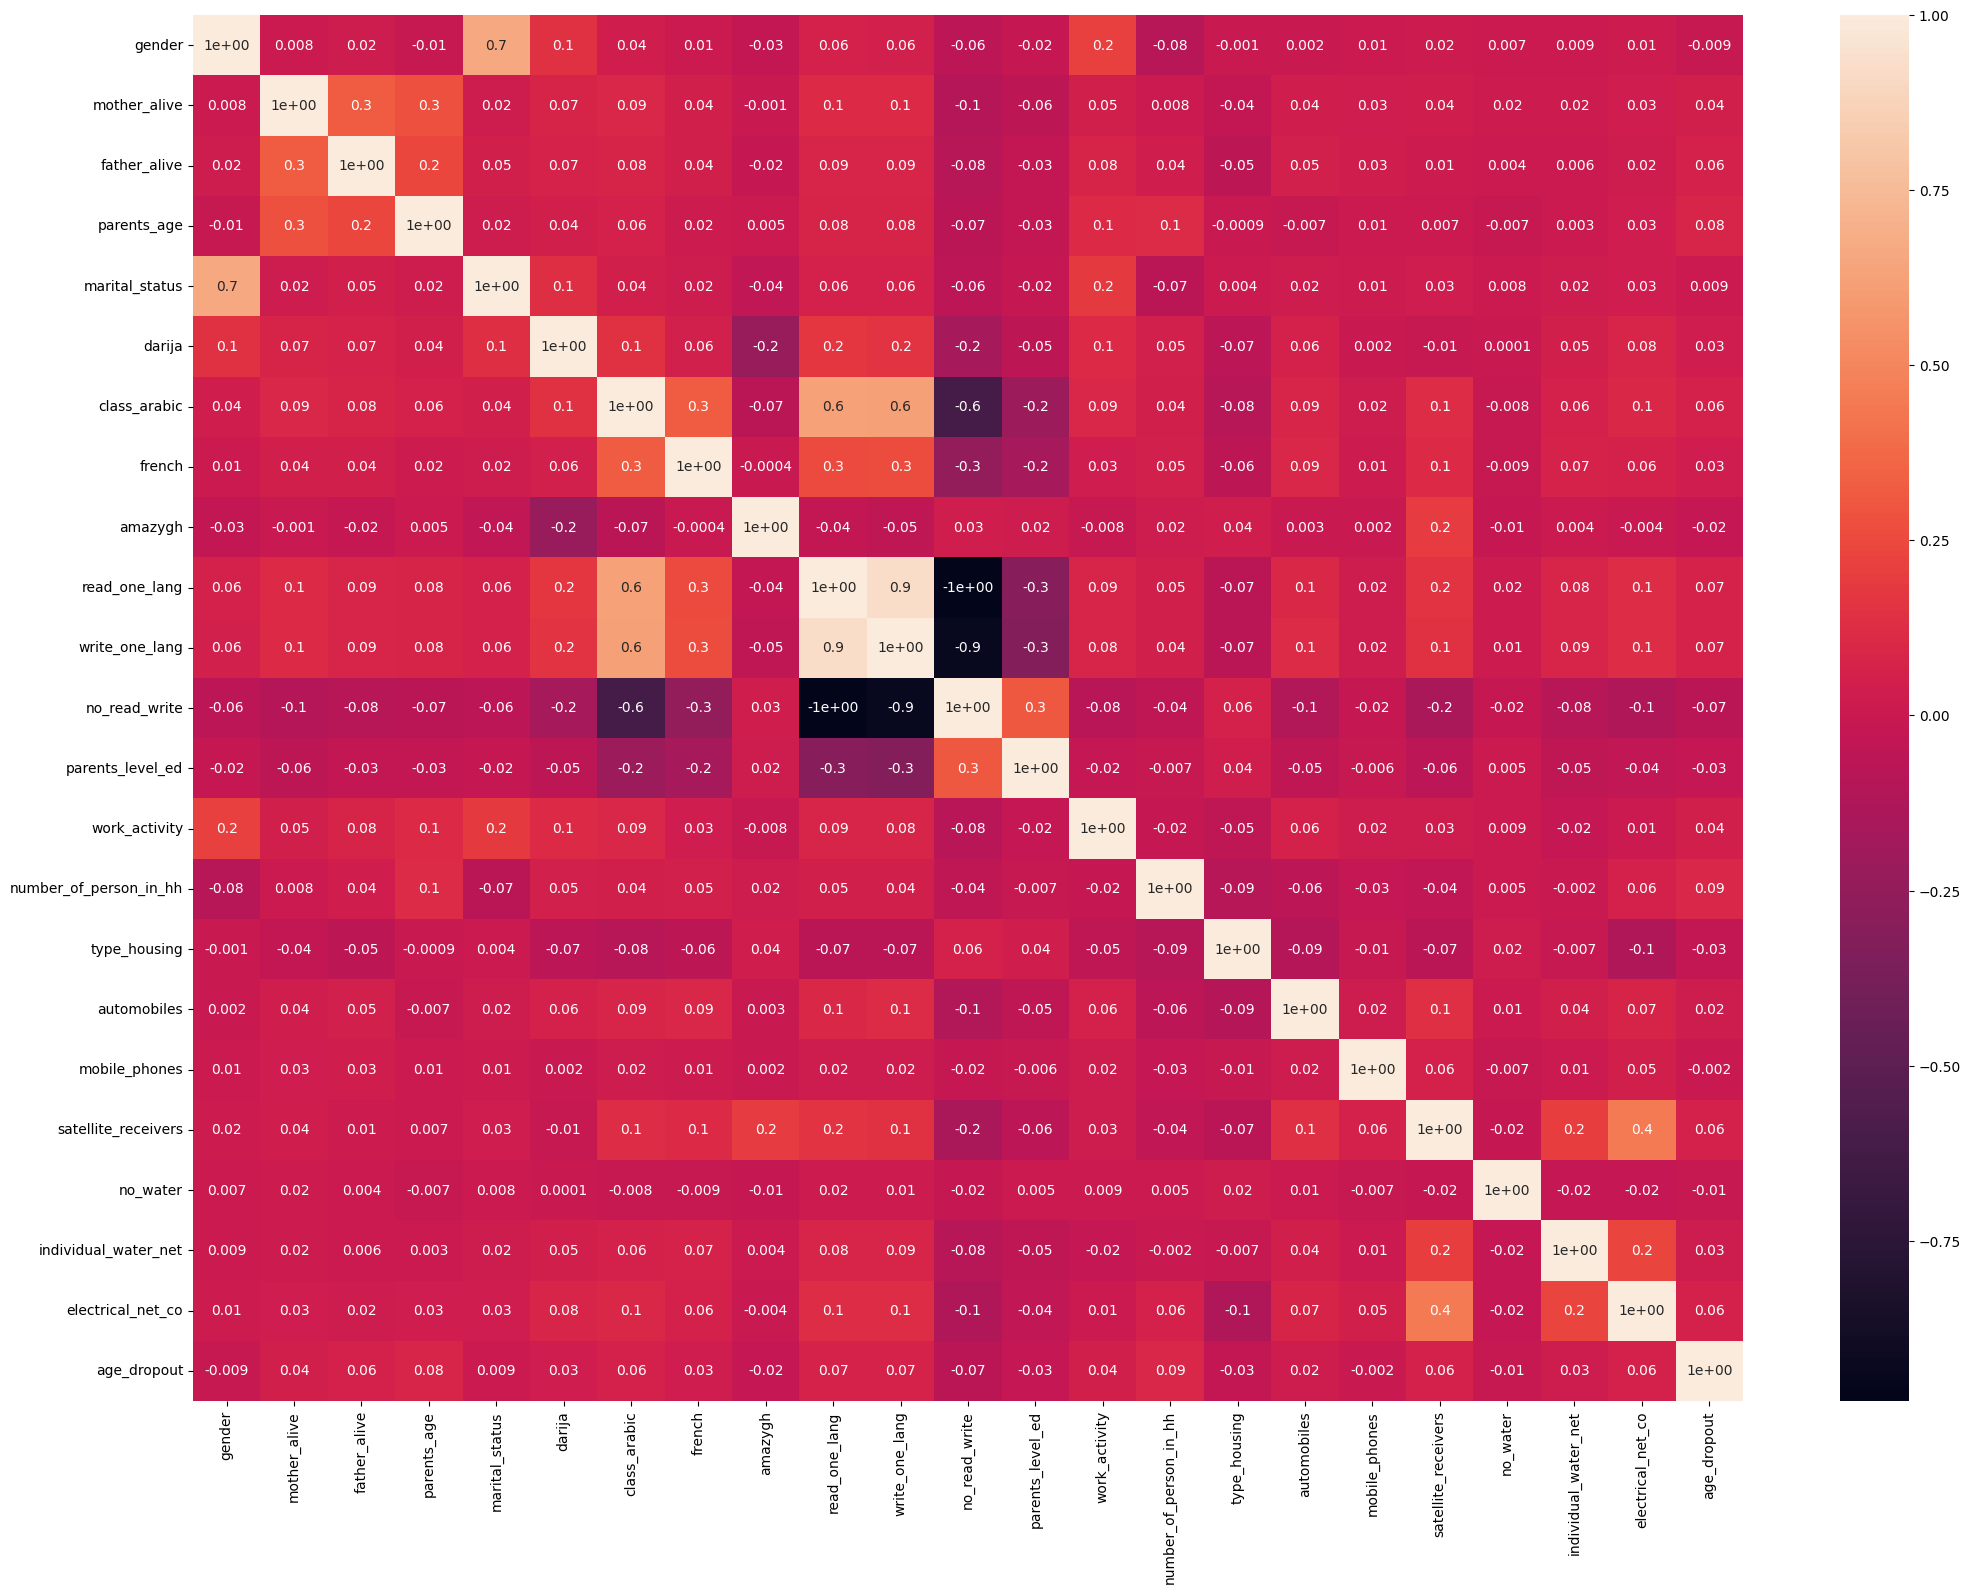

In [46]:
fix,ax=plt.subplots(1,1,figsize=(25,18))
sns.heatmap(training_data.corr(),annot=True,ax=ax,fmt='0.1')

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


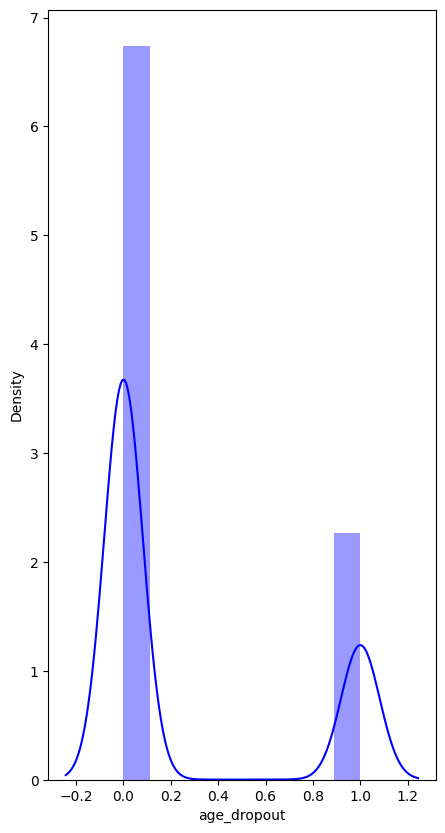

In [47]:
plt.figure(figsize=(5, 10))
sns.distplot(training_data['age_dropout'], color = "Blue");

# Balancing

In [48]:
X = training_data.drop(columns=["age_dropout"])
y = training_data["age_dropout"]

# Data Modelling

## Train test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3261, 25), (1088, 25), (3261,), (1088,))

In [50]:
# Removing spoken languages
X_train.drop(columns=["region", "province", "darija", "class_arabic", "french", "amazygh"], inplace=True)
X_test.drop(columns=["region", "province", "darija", "class_arabic", "french", "amazygh"], inplace=True)

# 
# X_train.drop(columns=["region", "province", "darija", "class_arabic", "french", "amazygh", "satellite_receivers", "write_one_lang" , "read_one_lang", "gender"], inplace=True)
# X_test.drop(columns=["region", "province", "darija", "class_arabic", "french", "amazygh", "satellite_receivers", "write_one_lang" , "read_one_lang", "gender"], inplace=True)

X_train.set_index("hhid", inplace=True)
X_test.set_index("hhid", inplace=True)

## Balancing Target

In [51]:
y_train.value_counts()

0.0    2447
1.0     814
Name: age_dropout, dtype: int64

In [52]:
# X_train.set_index("hhid", inplace=True)
# X_train.head()

In [53]:
# # X, y = make_classification(n_classes=2, class_sep=2,
# # weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# # n_features=20, n_clusters_per_class=1, n_samples=1000)
print('Original dataset shape %s' % Counter(y_train))
# oversample = SMOTE(sampling_strategy=1)
over = SMOTE(sampling_strategy=0.5)

# ros = RandomOverSampler()
# X_train, y_train = ros.fit_resample(X_train, y_train)
X_train, y_train = over.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train))


Original dataset shape Counter({0.0: 2447, 1.0: 814})
Resampled dataset shape Counter({0.0: 2447, 1.0: 1223})


/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


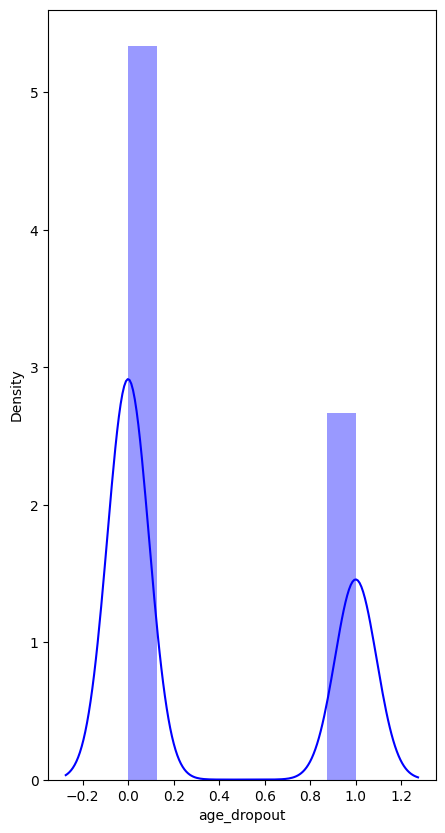

In [54]:
plt.figure(figsize=(5, 10))
sns.distplot(y_train, color = "Blue");

In [55]:
X_train.dtypes

gender                    float64
mother_alive              float64
father_alive              float64
parents_age               float64
marital_status            float64
read_one_lang             float64
write_one_lang            float64
no_read_write             float64
parents_level_ed          float64
work_activity             float64
number_of_person_in_hh    float64
type_housing              float64
automobiles               float64
mobile_phones             float64
satellite_receivers       float64
no_water                    int64
individual_water_net        int64
electrical_net_co           int64
dtype: object

## Categorical Features

In [56]:
# X_train_cat = X_train[["province", "region"]]
# X_train_cat

In [57]:
# X_test_cat = X_test[["province", "region"]]
# X_test_cat

In [58]:
# # Instantiate the OneHotEncoder
# ohe = OneHotEncoder(sparse = False) 
# # 
# # Fit encoder
# ohe.fit(X_train_cat) 

# # Transform X_train_cat and X_test_cat
# X_train_cat[ohe.get_feature_names_out()] = ohe.transform(X_train_cat)
# X_test_cat[ohe.get_feature_names_out()] = ohe.transform(X_test_cat)

In [59]:
# X_train_cat.drop(columns=["province", "region"], inplace=True)
# X_test_cat.drop(columns=["province", "region"], inplace=True)

## Numerical Features

In [60]:
# X_train_num = X_train.select_dtypes(include=["float64", "int64"])
# X_test_num = X_test.select_dtypes(include=["float64", "int64"])

In [61]:
# rob_scaler = RobustScaler()

# rob_scaler.fit(X_train_num)
# X_train_num[rob_scaler.get_feature_names_out()] = rob_scaler.transform(X_train_num)
# X_test_num[rob_scaler.get_feature_names_out()] = rob_scaler.transform(X_test_num)

## Combine encoded and scaled DataFrames

In [62]:
# X_train_scaled = pd.concat([X_train_num, X_train_cat], axis=1)

In [63]:
# X_test_scaled = pd.concat([X_test_num, X_test_cat], axis=1)

In [64]:
# X_train_scaled.shape, X_test_scaled.shape

In [65]:
# X_train_scaled

In [66]:
# X_train.columns

### Scaling with reduced features

In [67]:
# Withouth region and province
# X_train.drop(columns=["region", "province"], inplace=True)
# X_test.drop(columns=["region", "province"], inplace=True)

# Removing spoken languages
# X_train.drop(columns=["region", "province", "darija", "class_arabic", "french", "amazygh"], inplace=True)
# X_test.drop(columns=["region", "province", "darija", "class_arabic", "french", "amazygh"], inplace=True)

# 
# X_train.drop(columns=["region", "province", "darija", "class_arabic", "french", "amazygh", "satellite_receivers", "write_one_lang" , "read_one_lang", "gender"], inplace=True)
# X_test.drop(columns=["region", "province", "darija", "class_arabic", "french", "amazygh", "satellite_receivers", "write_one_lang" , "read_one_lang", "gender"], inplace=True)

# X_train.set_index("hhid", inplace=True)
# X_test.set_index("hhid", inplace=True)

In [68]:
X_train.shape

(3670, 18)

In [69]:
rob_scaler = RobustScaler()

rob_scaler.fit(X_train)
X_train[rob_scaler.get_feature_names_out()] = rob_scaler.transform(X_train)
X_test[rob_scaler.get_feature_names_out()] = rob_scaler.transform(X_test)

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# PCA Transformation

In [70]:
pca = PCA()
pca.fit(X_train_scaled)

# Metrics
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

# Dimensionality reduction
X_train_scaled = pca.transform(X_train_scaled)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=[f'PC{i}' for i in range(1, X_train_scaled.shape[1] + 1)])
X_train_scaled

[4.75075146e-01 1.36886889e-01 6.58348976e-02 5.78768848e-02
 5.25661468e-02 4.35848939e-02 3.36344110e-02 3.08838080e-02
 2.28177038e-02 2.00532342e-02 1.97249870e-02 1.64330725e-02
 1.56963538e-02 5.02878303e-03 1.88151469e-03 1.05508765e-03
 5.27214256e-04 4.38971938e-04]
[116.52107083  62.54667666  43.37618916  40.67016045  38.75934094
  35.29322206  31.00382131  29.70904792  25.53637698  23.93952475
  23.74278583  21.67118688  21.1798413   11.98822156   7.3329229
   5.49120406   3.88165457   3.541944  ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.533582,-0.071834,0.314946,-0.420920,-0.391042,-0.468314,-0.204514,0.286910,0.061674,-0.356463,0.760688,-0.117441,-0.457429,-0.042818,0.004242,0.005865,0.001350,0.001184
1,-0.700864,0.157301,1.090452,0.028291,0.193201,-0.196779,-0.325282,-0.597997,-0.032699,0.073588,0.179721,-0.405106,0.189032,-0.130312,-0.778134,0.021478,-0.033357,-0.065701
2,0.518445,0.050501,0.203530,-0.595793,-0.048695,-0.356619,-0.612454,-0.305610,0.927650,0.068642,-0.029016,0.804718,-0.428846,-0.026712,0.001038,0.003069,-0.002507,0.000732
3,0.626481,-1.041693,-0.723602,0.237210,-0.449507,0.394923,0.006872,0.560427,0.431128,-0.211000,-0.092375,-0.003520,0.209245,-0.004348,0.009251,-0.008275,-0.003978,0.003974
4,0.506759,0.791756,-0.747410,0.714265,-0.746530,0.079317,-0.697372,-0.292086,-0.650955,-0.262123,0.165425,0.028177,0.183186,-0.024623,0.009430,-0.024398,-0.008969,0.002426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,-1.448375,0.441263,-0.636506,0.138412,0.203237,-0.791615,0.467559,-0.587491,-0.473648,0.077659,-0.416229,-0.434089,0.180973,-0.044448,0.016188,-0.017942,-0.001770,0.000488
3666,-0.252502,0.003261,0.336652,-0.619069,0.054347,-0.830360,-0.032579,0.188498,-0.117376,0.278604,-0.492255,-0.290689,0.019668,-0.084541,0.006850,0.003912,-0.001023,-0.001592
3667,0.585380,-1.375112,-0.063203,0.457212,-0.187513,-0.462820,-0.500855,0.072573,-0.342029,0.069860,-0.544714,-0.137170,-0.529631,-0.040874,0.001047,-0.010398,-0.001875,0.005043
3668,0.515932,0.555077,-0.170139,-0.206832,-0.415537,-0.164473,-0.317367,-0.448585,0.457608,-0.103667,0.188662,-0.177610,-0.463380,0.008783,0.005531,-0.005094,-0.005442,0.002486


In [71]:
# Metrics
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

# Dimensionality reduction
X_test_scaled = pca.transform(X_test_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=[f'PC{i}' for i in range(1, X_test_scaled.shape[1] + 1)])
X_test_scaled

[4.75075146e-01 1.36886889e-01 6.58348976e-02 5.78768848e-02
 5.25661468e-02 4.35848939e-02 3.36344110e-02 3.08838080e-02
 2.28177038e-02 2.00532342e-02 1.97249870e-02 1.64330725e-02
 1.56963538e-02 5.02878303e-03 1.88151469e-03 1.05508765e-03
 5.27214256e-04 4.38971938e-04]
[116.52107083  62.54667666  43.37618916  40.67016045  38.75934094
  35.29322206  31.00382131  29.70904792  25.53637698  23.93952475
  23.74278583  21.67118688  21.1798413   11.98822156   7.3329229
   5.49120406   3.88165457   3.541944  ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.508987,0.716654,-0.180234,-0.614140,-0.471881,0.178607,-1.022041,0.472541,0.680711,0.026960,-0.057891,0.079833,0.192469,-0.039473,0.002522,0.000557,-0.009355,-0.000574
1,0.501974,0.873213,-0.179096,-0.777254,-0.205326,0.274939,-0.418397,-0.499164,-0.620797,-0.034405,0.298242,0.015069,0.145776,0.963467,-0.022188,-0.014917,-0.012241,0.005681
2,0.459643,0.650801,0.377096,-0.366103,-0.048070,-0.925781,0.124916,0.180914,-0.111450,0.275988,-0.509818,-0.344268,0.237951,-0.087845,0.011061,-0.000269,-0.001408,-0.003475
3,0.595819,-0.929935,0.112783,-0.748526,-0.373787,0.154228,0.049603,0.760495,-0.328586,-0.081816,0.140069,0.056730,0.131486,-0.061290,0.003994,0.011207,-0.001170,0.001980
4,0.574087,-1.113041,0.439307,-0.366418,-0.262363,-0.553541,0.784075,-0.488652,-0.247101,-0.002134,0.180100,-0.443166,0.227327,-0.062162,0.014958,0.007132,-0.001783,-0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,0.571951,-1.524418,0.836939,-0.993865,0.573017,-0.894856,0.080101,0.830718,0.286033,0.034053,0.056499,-0.331331,0.203305,-0.128616,0.006113,0.019085,0.003246,-0.001866
1084,0.523957,0.457639,0.190881,-2.941233,2.421220,0.206615,-0.863236,0.808430,0.034125,0.051831,0.302967,0.082021,-0.077191,-0.111210,-0.011104,0.025921,-0.001740,0.003501
1085,0.575548,-0.972190,-0.740497,1.236600,0.159940,-0.508076,-0.479508,0.160623,-0.427617,-0.145732,-0.572702,-0.147595,-0.521719,-0.023251,0.004278,-0.029073,0.000094,0.006715
1086,0.543238,0.258966,-0.699732,0.060470,-0.008879,0.286609,-0.585775,-0.592670,-0.689375,-0.219805,0.245184,-0.012445,0.096956,-0.025579,0.006137,-0.016687,-0.009477,0.004880


## Model Selection

In [72]:
def custom_predict(model, X, custom_threshold):
    probs = model.predict_proba(X) # Get likelihood of each sample being classified as 0 or 1
    dropout_probs = probs[:, 1] # Only keep dropout likelihoods (1) 
    return (dropout_probs > custom_threshold).astype(int) # Boolean outcome converted to 0 or 1

In [73]:
def perform(y_true, y_pred):
    print("Precision : ", precision_score(y_true, y_pred))
    print("Recall : ", recall_score(y_true, y_pred))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_true, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm)
    cm.plot()

### Gaussian Naive Bayes

In [74]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

GaussianNB()

In [75]:
y_pred_nb = model_nb.predict(X_test_scaled)
y_pred_nb

array([1., 0., 1., ..., 1., 1., 1.])

Precision :  0.26641414141414144
Recall :  0.7535714285714286
Accuracy :  0.4025735294117647
F1 Score :  0.3936567164179105

 [[227 581]
 [ 69 211]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.77      0.28      0.41       808
         1.0       0.27      0.75      0.39       280

    accuracy                           0.40      1088
   macro avg       0.52      0.52      0.40      1088
weighted avg       0.64      0.40      0.41      1088

******************************************************



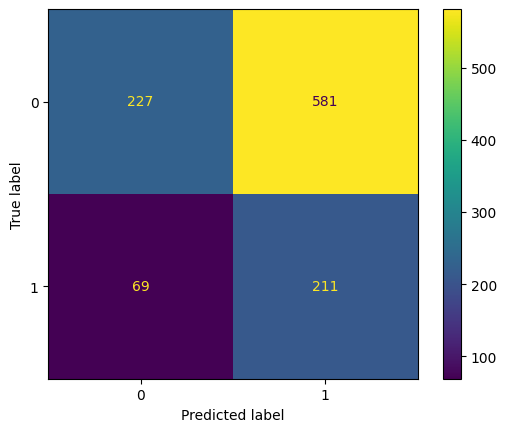

In [76]:
perform(y_test, y_pred_nb)

#### Feature Permutation

In [77]:
# Score without permutation

# Model to be cross-validated
model_nb = GaussianNB()

# Cross Validation
np.mean(cross_val_score(model_nb, X_train_scaled, y_train , cv=5))

0.4891008174386921

In [78]:
# Fit model
model_nb = GaussianNB().fit(X_train_scaled, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model_nb, X_train_scaled, y_train, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train_scaled.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
0,PC1,0.030327
3,PC4,0.003624
1,PC2,0.001335
5,PC6,0.000872
12,PC13,0.000817
16,PC17,0.000654
4,PC5,0.0003
2,PC3,0.000245
8,PC9,-0.000327
11,PC12,-0.000463


In [79]:
X_train_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.533582,-0.071834,0.314946,-0.420920,-0.391042,-0.468314,-0.204514,0.286910,0.061674,-0.356463,0.760688,-0.117441,-0.457429,-0.042818,0.004242,0.005865,0.001350,0.001184
1,-0.700864,0.157301,1.090452,0.028291,0.193201,-0.196779,-0.325282,-0.597997,-0.032699,0.073588,0.179721,-0.405106,0.189032,-0.130312,-0.778134,0.021478,-0.033357,-0.065701
2,0.518445,0.050501,0.203530,-0.595793,-0.048695,-0.356619,-0.612454,-0.305610,0.927650,0.068642,-0.029016,0.804718,-0.428846,-0.026712,0.001038,0.003069,-0.002507,0.000732
3,0.626481,-1.041693,-0.723602,0.237210,-0.449507,0.394923,0.006872,0.560427,0.431128,-0.211000,-0.092375,-0.003520,0.209245,-0.004348,0.009251,-0.008275,-0.003978,0.003974
4,0.506759,0.791756,-0.747410,0.714265,-0.746530,0.079317,-0.697372,-0.292086,-0.650955,-0.262123,0.165425,0.028177,0.183186,-0.024623,0.009430,-0.024398,-0.008969,0.002426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,-1.448375,0.441263,-0.636506,0.138412,0.203237,-0.791615,0.467559,-0.587491,-0.473648,0.077659,-0.416229,-0.434089,0.180973,-0.044448,0.016188,-0.017942,-0.001770,0.000488
3666,-0.252502,0.003261,0.336652,-0.619069,0.054347,-0.830360,-0.032579,0.188498,-0.117376,0.278604,-0.492255,-0.290689,0.019668,-0.084541,0.006850,0.003912,-0.001023,-0.001592
3667,0.585380,-1.375112,-0.063203,0.457212,-0.187513,-0.462820,-0.500855,0.072573,-0.342029,0.069860,-0.544714,-0.137170,-0.529631,-0.040874,0.001047,-0.010398,-0.001875,0.005043
3668,0.515932,0.555077,-0.170139,-0.206832,-0.415537,-0.164473,-0.317367,-0.448585,0.457608,-0.103667,0.188662,-0.177610,-0.463380,0.008783,0.005531,-0.005094,-0.005442,0.002486


#### Precision-Recall tradeoff

In [80]:
# Predict class probabilties
# data = X_train_scaled.copy()
proba_enrolled, proba_dropout =cross_val_predict(GaussianNB(),
                                                                X_train_scaled,
                                                                y_train,
                                                                cv=5,
                                                                method='predict_proba').T

# precision recall data
precision, recall, threshold = precision_recall_curve(y_train, proba_dropout) 

print(f'precision- {precision[:5]}')
print(f'recall- {recall[:5]}')
print(f'threshold- {threshold[:5]}')

precision- [0.33324251 0.33333333 0.33315158 0.33324243 0.33333333]
recall- [1.         1.         0.99918234 0.99918234 0.99918234]
threshold- [0.00000000e+00 8.05078601e-56 1.74750056e-54 7.64537858e-45
 7.87522174e-45]


In [81]:
scores = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]}) # Store in a dataframe
scores

,threshold,precision,recall
0,0.000000e+00,0.333243,1.000000
1,8.050786e-56,0.333333,1.000000
2,1.747501e-54,0.333152,0.999182
3,7.645379e-45,0.333242,0.999182
4,7.875222e-45,0.333333,0.999182
...,...,...,...
3634,9.618987e-01,0.285714,0.003271
3635,9.678129e-01,0.307692,0.003271
3636,1.000000e+00,0.333333,0.003271
3637,1.000000e+00,0.272727,0.002453


Text(0.5, 0, 'recall')

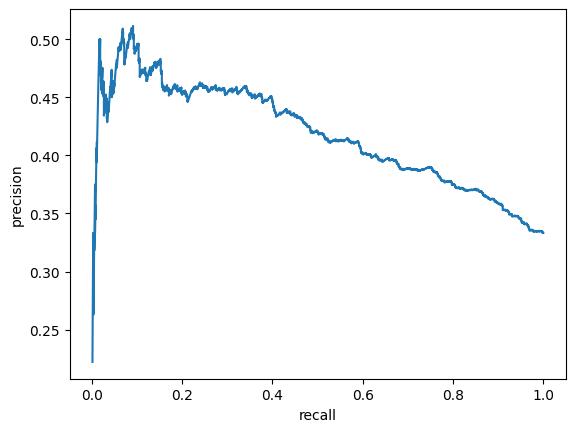

In [82]:
plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')

In [83]:
updated_thres = scores[scores['recall'] >= 0.60].threshold.max()
updated_thres

0.7378013034172601

#### Updated threshold

In [84]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)    
    
updated_preds = custom_predict(model=model_nb, X=X_test_scaled, custom_threshold=updated_thres) # Update predictions 

print("Recall:", recall_score(y_test, updated_preds)) # Rerun recall
print("Precision:", precision_score(y_test, updated_preds)) # Rerun precision
print("F1 Score:", f1_score(y_test, updated_preds)) # Rerun f1

Recall: 0.5321428571428571
Precision: 0.2582322357019064
F1 Score: 0.34772462077012833


Precision :  0.2582322357019064
Recall :  0.5321428571428571
Accuracy :  0.48621323529411764
F1 Score :  0.34772462077012833

 [[380 428]
 [131 149]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.74      0.47      0.58       808
         1.0       0.26      0.53      0.35       280

    accuracy                           0.49      1088
   macro avg       0.50      0.50      0.46      1088
weighted avg       0.62      0.49      0.52      1088

******************************************************



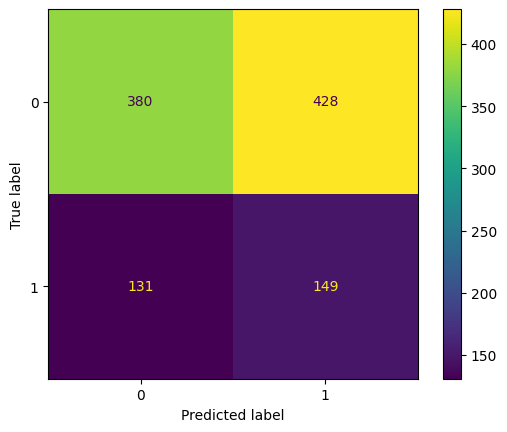

In [85]:
perform(y_test, updated_preds)

### Logistic Regression

In [86]:
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [87]:
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_lr

array([0., 0., 0., ..., 0., 0., 0.])

Precision :  0.21052631578947367
Recall :  0.04285714285714286
Accuracy :  0.7123161764705882
F1 Score :  0.07121661721068248

 [[763  45]
 [268  12]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.74      0.94      0.83       808
         1.0       0.21      0.04      0.07       280

    accuracy                           0.71      1088
   macro avg       0.48      0.49      0.45      1088
weighted avg       0.60      0.71      0.63      1088

******************************************************



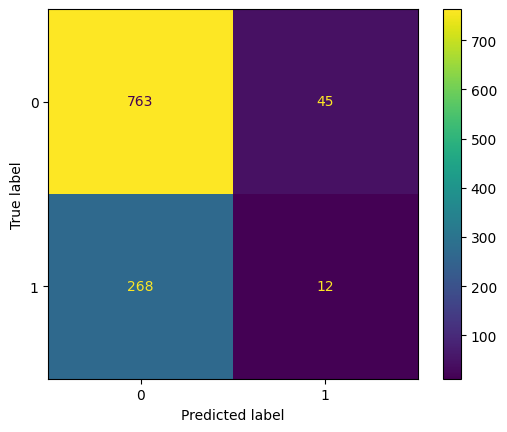

In [88]:
perform(y_test, y_pred_lr)

#### Feature Permutation

In [89]:
# Score without permutation

# Model to be cross-validated
model_lr = LogisticRegression(max_iter=1000)

# Cross Validation
np.mean(cross_val_score(model_lr, X_train_scaled, y_train , cv=5))

0.6566757493188011

In [90]:
# Fit model
model_lr = LogisticRegression(max_iter=1000).fit(X_train_scaled, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model_lr, X_train_scaled, y_train, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train_scaled.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
3,PC4,0.005286
1,PC2,0.003869
12,PC13,0.002044
13,PC14,0.001417
7,PC8,0.000681
2,PC3,0.000627
11,PC12,0.000354
10,PC11,0.000354
0,PC1,0.000245
17,PC18,0.000191


### Random Forest Classifier

In [91]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [92]:
y_pred_rf = model_rf.predict(X_test)
y_pred_rf

array([0., 1., 0., ..., 0., 0., 0.])

Precision :  0.2857142857142857
Recall :  0.11428571428571428
Accuracy :  0.6985294117647058
F1 Score :  0.16326530612244897

 [[728  80]
 [248  32]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82       808
         1.0       0.29      0.11      0.16       280

    accuracy                           0.70      1088
   macro avg       0.52      0.51      0.49      1088
weighted avg       0.63      0.70      0.65      1088

******************************************************



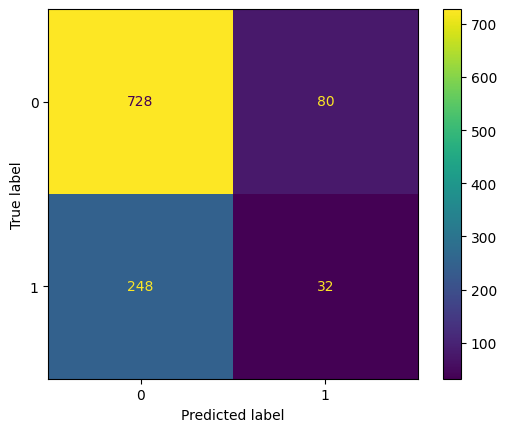

In [93]:
perform(y_test, y_pred_rf)

#### Feature permutation

In [94]:
# Score without permutation

# Model to be cross-validated
model_rf = RandomForestClassifier()

# Cross Validation
np.mean(cross_val_score(model_rf, X_train, y_train , cv=5))

0.747683923705722

In [95]:
# Fit model
model_rf = RandomForestClassifier().fit(X_train, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model_rf, X_train, y_train, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
10,number_of_person_in_hh,0.186185
3,parents_age,0.186131
11,type_housing,0.11267
9,work_activity,0.106485
2,father_alive,0.102153
14,satellite_receivers,0.096621
13,mobile_phones,0.089482
1,mother_alive,0.081308
17,electrical_net_co,0.078283
8,parents_level_ed,0.049728


### XGBoost Classifier

In [96]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [97]:
y_pred_xgb = model_xgb.predict(X_test_scaled)
y_pred_xgb

array([0, 1, 0, ..., 0, 0, 0])

Precision :  0.2760416666666667
Recall :  0.18928571428571428
Accuracy :  0.6636029411764706
F1 Score :  0.2245762711864407

 [[669 139]
 [227  53]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.75      0.83      0.79       808
         1.0       0.28      0.19      0.22       280

    accuracy                           0.66      1088
   macro avg       0.51      0.51      0.50      1088
weighted avg       0.63      0.66      0.64      1088

******************************************************



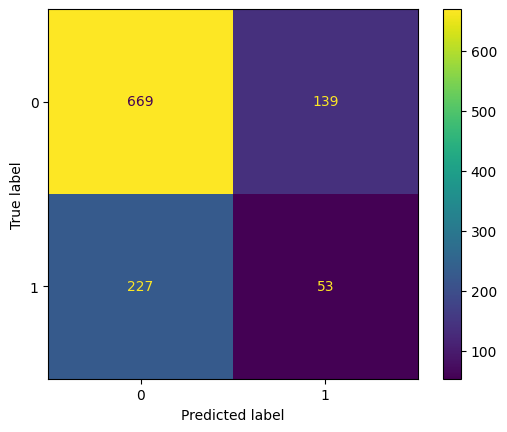

In [98]:
perform(y_test, y_pred_xgb)

#### Feature Permutation

In [99]:
# Score without permutation

# Model to be cross-validated
model_xgb = XGBClassifier()

# Cross Validation
np.mean(cross_val_score(model_xgb, X_train_scaled, y_train , cv=5))

0.697275204359673

In [100]:
# Fit model
model_xgb = XGBClassifier().fit(X_train_scaled, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model_xgb, X_train_scaled, y_train, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train_scaled.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
1,PC2,0.055722
8,PC9,0.051662
4,PC5,0.049673
3,PC4,0.043134
0,PC1,0.041662
12,PC13,0.036921
7,PC8,0.028665
10,PC11,0.027112
6,PC7,0.017221
17,PC18,0.01346


### Support Vector Classifier

In [101]:
model_svc = SVC()
model_svc.fit(X_train_scaled, y_train)

SVC()

In [102]:
y_pred_svc = model_svc.predict(X_test_scaled)
y_pred_svc

array([0., 0., 0., ..., 0., 0., 0.])

Precision :  0.0
Recall :  0.0
Accuracy :  0.7380514705882353
F1 Score :  0.0

 [[803   5]
 [280   0]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.74      0.99      0.85       808
         1.0       0.00      0.00      0.00       280

    accuracy                           0.74      1088
   macro avg       0.37      0.50      0.42      1088
weighted avg       0.55      0.74      0.63      1088

******************************************************



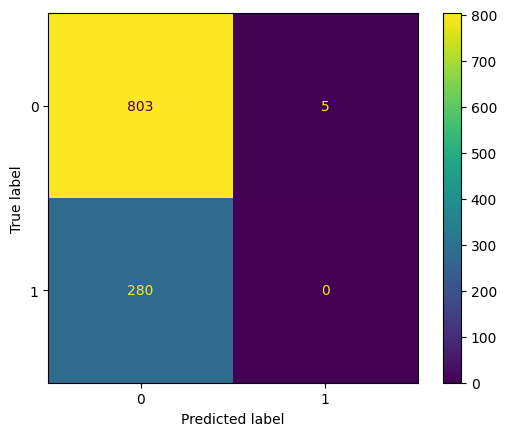

In [103]:
perform(y_test, y_pred_svc)

#### Feature Permutation

In [104]:
# Score without permutation

# Model to be cross-validated
model_svc = SVC()

# Cross Validation
np.mean(cross_val_score(model_svc, X_train_scaled, y_train , cv=5))

0.6700272479564033

In [105]:
# Fit model
model_svc = SVC().fit(X_train_scaled, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model_svc, X_train_scaled, y_train, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train_scaled.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
1,PC2,0.004087
6,PC7,0.003079
11,PC12,0.002616
13,PC14,0.002452
0,PC1,0.001935
12,PC13,0.001744
7,PC8,0.001308
5,PC6,0.001117
3,PC4,0.000899
9,PC10,0.000872


### Multi-layer Perceptron

In [106]:
model_mlp = MLPClassifier()
model_mlp.fit(X_train_scaled, y_train)

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [107]:
y_pred_mlp = model_mlp.predict(X_test_scaled)
y_pred_mlp

array([0., 0., 0., ..., 0., 0., 0.])

Precision :  0.27692307692307694
Recall :  0.19285714285714287
Accuracy :  0.6626838235294118
F1 Score :  0.2273684210526316

 [[667 141]
 [226  54]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.75      0.83      0.78       808
         1.0       0.28      0.19      0.23       280

    accuracy                           0.66      1088
   macro avg       0.51      0.51      0.51      1088
weighted avg       0.63      0.66      0.64      1088

******************************************************



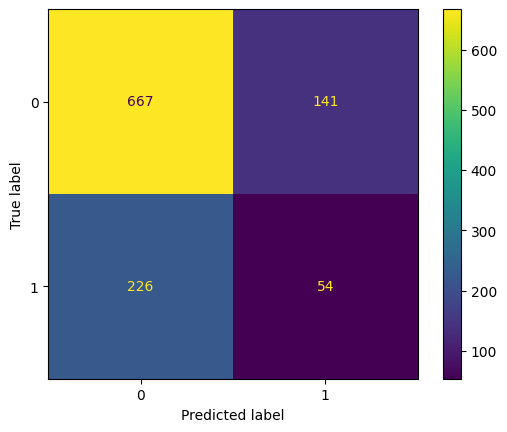

In [108]:
perform(y_test, y_pred_mlp)

#### Feature Permutation

In [109]:
# Score without permutation

# Model to be cross-validated
model_mlp = MLPClassifier()

# Cross Validation
np.mean(cross_val_score(model_mlp, X_train_scaled, y_train , cv=5))

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2

0.6787465940054496

In [110]:
# Fit model
model_mlp = MLPClassifier().fit(X_train_scaled, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model_mlp, X_train_scaled, y_train, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train_scaled.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

/Users/yusuke/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,feature,score decrease
1,PC2,0.069973
8,PC9,0.056158
2,PC3,0.055259
4,PC5,0.054441
3,PC4,0.052916
5,PC6,0.049591
7,PC8,0.048774
0,PC1,0.048365
6,PC7,0.047956
12,PC13,0.040817


### KNeighbors Classifier

In [111]:
model_kn = KNeighborsClassifier(n_neighbors=8, weights='distance')
model_kn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [112]:
y_pred_kn = model_kn.predict(X_test_scaled)
y_pred_kn

array([0., 1., 0., ..., 0., 0., 0.])

Precision :  0.29464285714285715
Recall :  0.2357142857142857
Accuracy :  0.6580882352941176
F1 Score :  0.2619047619047619

 [[650 158]
 [214  66]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.75      0.80      0.78       808
         1.0       0.29      0.24      0.26       280

    accuracy                           0.66      1088
   macro avg       0.52      0.52      0.52      1088
weighted avg       0.63      0.66      0.64      1088

******************************************************



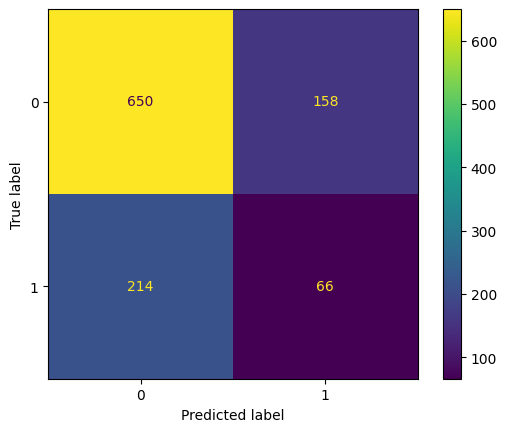

In [113]:
perform(y_test, y_pred_kn)

#### Feature Permutation

In [114]:
# Score without permutation

# Model to be cross-validated
model_kn = KNeighborsClassifier(n_neighbors=8, weights='distance')
# Cross Validation
np.mean(cross_val_score(model_kn, X_train_scaled, y_train , cv=5))

0.7114441416893732

In [115]:
# Fit model
model_kn = KNeighborsClassifier(n_neighbors=8, weights='distance').fit(X_train_scaled, y_train) 

# Performs Permutation
permutation_score = permutation_importance(model_kn, X_train_scaled, y_train, n_repeats=10) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X_train_scaled.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
1,PC2,0.252125
4,PC5,0.206839
3,PC4,0.194578
2,PC3,0.169319
7,PC8,0.16842
5,PC6,0.164005
6,PC7,0.158338
8,PC9,0.15515
0,PC1,0.147221
11,PC12,0.115586


### Precision Recall Curve

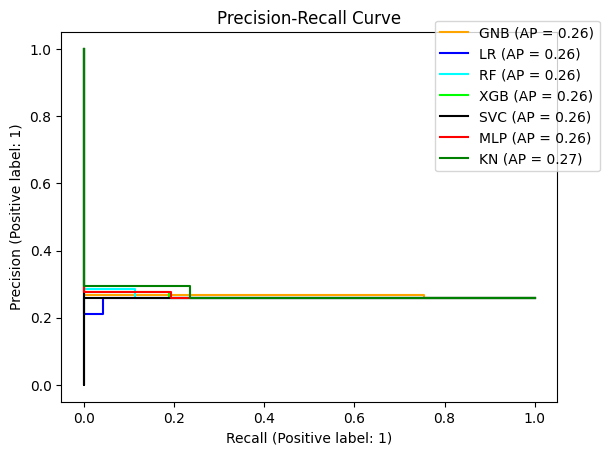

In [116]:
fig, ax = plt.subplots()
plt.title("Precision-Recall Curve")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, ax = ax, name = "GNB", color='orange')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LR", color='blue')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, ax = ax, name = "XGB", color='lime')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='black')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mlp, ax = ax, name = "MLP", color='red')
PrecisionRecallDisplay.from_predictions(y_test, y_pred_kn, ax = ax, name = "KN", color='green')

ax.legend(bbox_to_anchor=(1.1, 1.05))

### ROC Curve

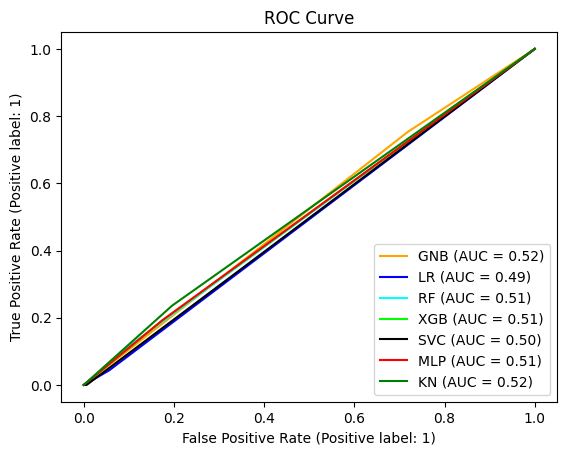

In [117]:
fig, ax = plt.subplots()
plt.title("ROC Curve")
RocCurveDisplay.from_predictions(y_test, y_pred_nb, ax = ax, name = "GNB", color='orange')
RocCurveDisplay.from_predictions(y_test, y_pred_lr, ax = ax, name = "LR", color='blue')
RocCurveDisplay.from_predictions(y_test, y_pred_rf, ax = ax, name = "RF", color='cyan')
RocCurveDisplay.from_predictions(y_test, y_pred_xgb, ax = ax, name = "XGB", color='lime')
RocCurveDisplay.from_predictions(y_test, y_pred_svc, ax = ax, name = "SVC", color='black')
RocCurveDisplay.from_predictions(y_test, y_pred_mlp, ax = ax, name = "MLP", color='red')
RocCurveDisplay.from_predictions(y_test, y_pred_kn, ax = ax, name = "KN", color='green')

# Modelling with reduced features

In [118]:
columns_to_reduce = [
    
]

# Ensemble Methods

In [119]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    """Plot the 2D-decision region of a classifier with matplotlib along its first two dimensions X[:,0] and X[:,1].

    Args:
        X (np.Array): (n,p) dataset to classify
        y (np.Array): (n,) array of labels. Works well up to 5 unique labels.
        classifier (sklearn): fitted sklearn classifier.
        test_idx (int, optional):  Index of test datapoints within X to display with a larger mark style. Defaults to None.
        resolution (float, optional): Resolution of the meshgrid used to colorize regions. Defaults to 0.02.
    """

    # setup marker generator and color map up for up to 5 classes
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    marker='x', label=cl)

    # Plot test samples if they exist
    if not test_idx is None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        for idx, cl in enumerate(np.unique(y_test)):
            plt.scatter(x=X_test[y_test == cl, 0], y=X_test[y_test == cl, 1],
                        alpha=1, color=cmap(idx),
                        linewidths=1, marker='o', s=55, label=f'test {cl}')
    plt.legend()


In [120]:
y_train.value_counts()

0.0    2447
1.0    1223
Name: age_dropout, dtype: int64

In [128]:
from sklearn.ensemble import VotingClassifier

forest = RandomForestClassifier()
logreg = LogisticRegression(max_iter=1000)
nbayes = GaussianNB()
xgboost = XGBClassifier()
svc = SVC(probability=True)
mlp = MLPClassifier()
kneighbors = KNeighborsClassifier(n_neighbors=8, weights='distance')


ensemble = VotingClassifier(
    estimators = [
        ("rf", forest),
#         ("lr", logreg), 
        ("nbayes", nbayes), 
        ("xgboost", xgboost), 
        ("svc", svc), 
#         ("mlp", mlp), 
#         ("kn", kneighbors),
    ],
    voting = 'soft', # to use predict_proba of each classifier before voting
    weights = [1,1,1,1] # to equally weight forest and logreg in the vote
)
ensemble.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('nbayes', GaussianNB()),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None...
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('svc', SVC(probability=True))],
                 voting='soft', weights=[1, 1, 1, 1])

In [ ]:
# X_plot = X_train_scaled.reset_index()
# X_plot.head()

In [129]:
X_train_scaled.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.533582,-0.071834,0.314946,-0.420920,-0.391042,-0.468314,-0.204514,0.286910,0.061674,-0.356463,0.760688,-0.117441,-0.457429,-0.042818,0.004242,0.005865,0.001350,0.001184
1,-0.700864,0.157301,1.090452,0.028291,0.193201,-0.196779,-0.325282,-0.597997,-0.032699,0.073588,0.179721,-0.405106,0.189032,-0.130312,-0.778134,0.021478,-0.033357,-0.065701
2,0.518445,0.050501,0.203530,-0.595793,-0.048695,-0.356619,-0.612454,-0.305610,0.927650,0.068642,-0.029016,0.804718,-0.428846,-0.026712,0.001038,0.003069,-0.002507,0.000732
3,0.626481,-1.041693,-0.723602,0.237210,-0.449507,0.394923,0.006872,0.560427,0.431128,-0.211000,-0.092375,-0.003520,0.209245,-0.004348,0.009251,-0.008275,-0.003978,0.003974
4,0.506759,0.791756,-0.747410,0.714265,-0.746530,0.079317,-0.697372,-0.292086,-0.650955,-0.262123,0.165425,0.028177,0.183186,-0.024623,0.009430,-0.024398,-0.008969,0.002426


In [130]:
y_pred_ensemble = ensemble.predict(X_test_scaled)
y_pred_ensemble

array([0., 0., 0., ..., 0., 0., 0.])

In [131]:
y_test.value_counts()

0.0    808
1.0    280
Name: age_dropout, dtype: int64

Precision :  0.2909090909090909
Recall :  0.22857142857142856
Accuracy :  0.6580882352941176
F1 Score :  0.256

 [[652 156]
 [216  64]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78       808
         1.0       0.29      0.23      0.26       280

    accuracy                           0.66      1088
   macro avg       0.52      0.52      0.52      1088
weighted avg       0.63      0.66      0.64      1088

******************************************************



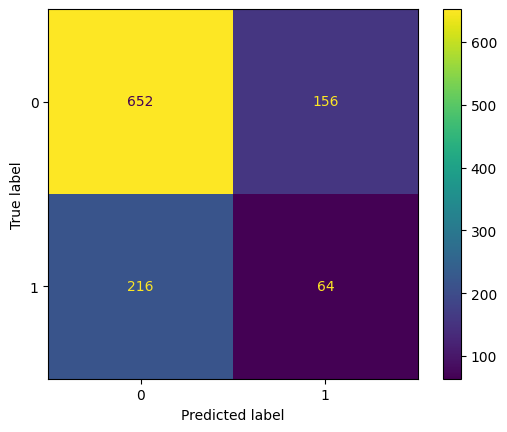

In [132]:
perform(y_test, y_pred_ensemble)

In [133]:
# plot_decision_regions(X_train_scaled, y_train, classifier=ensemble)